In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from tqdm import tqdm

In [2]:
data = np.loadtxt("data.txt", delimiter=',', skiprows=1, dtype=float)
data

array([[  30.   ,   78.697],
       [  60.   ,   80.329],
       [  90.   ,   81.891],
       [ 120.   ,   83.38 ],
       [ 150.   ,   84.791],
       [ 180.   ,   86.121],
       [ 210.   ,   87.365],
       [ 240.   ,   88.52 ],
       [ 270.   ,   89.584],
       [ 300.   ,   90.553],
       [ 330.   ,   91.424],
       [ 360.   ,   92.195],
       [ 390.   ,   92.865],
       [ 420.   ,   93.43 ],
       [ 450.   ,   93.891],
       [ 480.   ,   94.245],
       [ 510.   ,   94.491],
       [ 540.   ,   94.629],
       [ 570.   ,   94.658],
       [ 600.   ,   94.579],
       [ 630.   ,   94.391],
       [ 660.   ,   94.095],
       [ 690.   ,   93.692],
       [ 720.   ,   93.183],
       [ 750.   ,   92.57 ],
       [ 780.   ,   91.853],
       [ 810.   ,   91.035],
       [ 840.   ,   90.119],
       [ 870.   ,   89.106],
       [ 900.   ,   88.   ],
       [ 930.   ,   86.803],
       [ 960.   ,   85.52 ],
       [ 990.   ,   84.152],
       [1020.   ,   82.705],
       [1050. 

In [70]:
t = data[:, 0]
delta_r = data[:, 1]


100%|██████████| 50/50 [00:00<00:00, 49496.15it/s]


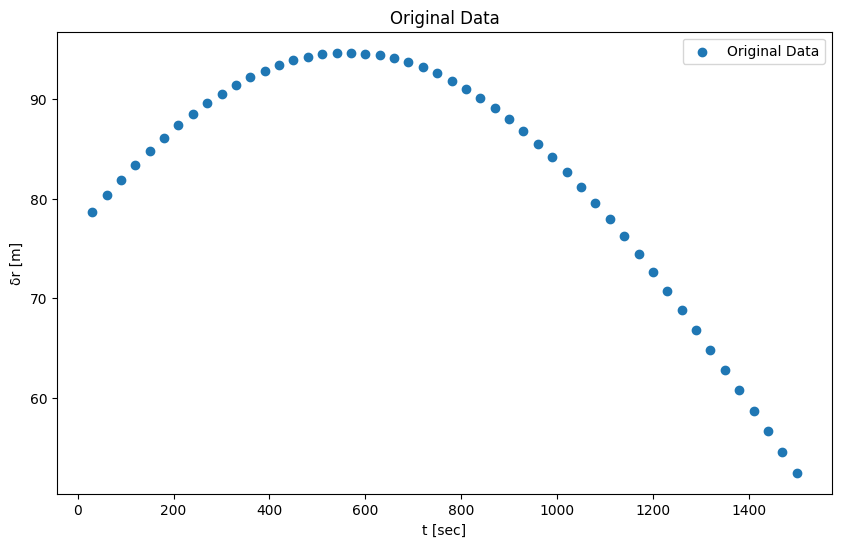

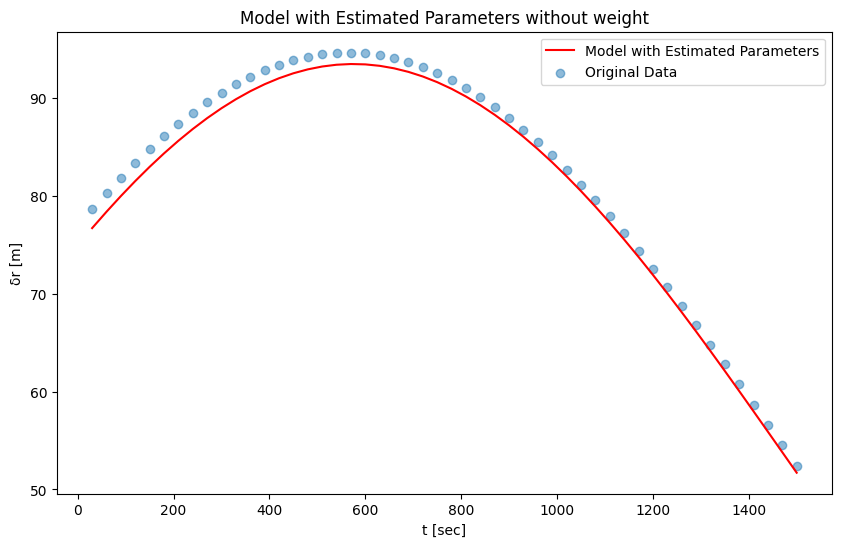

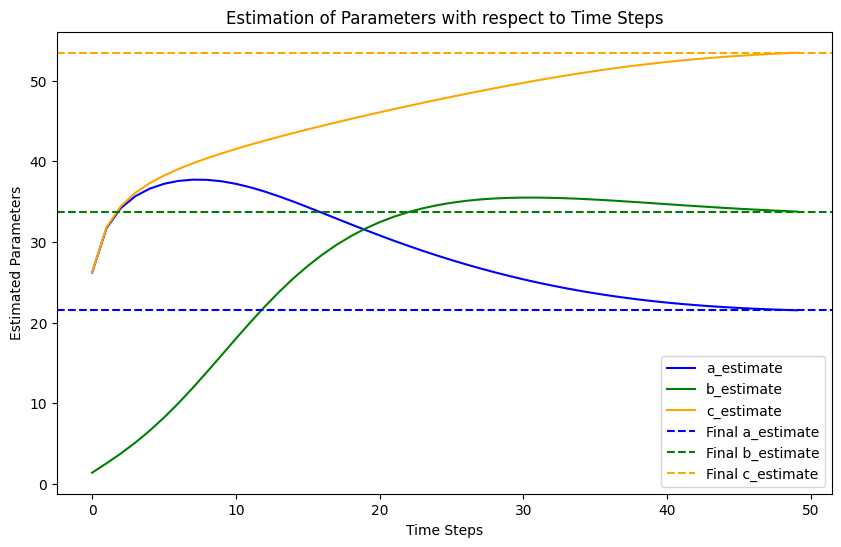

In [95]:
import matplotlib.pyplot as plt 
import numpy as np 
from tqdm import tqdm

data = np.loadtxt("data.txt", delimiter=',', skiprows=1, dtype=float)

t = data[:, 0]
delta_r = data[:, 1]

# Estimate the model parameters a and b in equation (1) based on the least squares method orrecursive least squares method
# delta_r = a * np.cos((2 * np.pi)/3600 * data['Time']) + b * np.sin((2 * np.pi)/3600 * data['Time']) + c

def RecursiveLeastSquare(t, delta_r):
    Pm = np.eye(3)
    a_estimate, b_estimate, c_estimate = 0, 0, 0

    # Lists to store the estimates through time
    a_estimates = []
    b_estimates = []
    c_estimates = []
    time_steps = []

    for i in tqdm(range(len(t))):
        amt = np.array([np.cos(2 * np.pi * t[i] / 3600), np.sin(2 * np.pi * t[i] / 3600), 1])

        e_i = delta_r[i] - np.dot(amt, np.array([a_estimate, b_estimate, c_estimate]))
       
        K = np.dot(Pm, amt) / (1 + np.dot(np.dot(amt, Pm), amt))
        
        # update the estimation parameters
        a_estimate += K[0] * e_i
        b_estimate += K[1] * e_i
        c_estimate += K[2] * e_i

        # Store the estimates at this iteration
        a_estimates.append(a_estimate)
        b_estimates.append(b_estimate)
        c_estimates.append(c_estimate)
        time_steps.append(i)

        Pm = (Pm - np.outer(K, np.dot(amt, Pm))) 

    return a_estimate, b_estimate, c_estimate, a_estimates, b_estimates, c_estimates, time_steps

a_estimate, b_estimate, c_estimate, a_estimates, b_estimates, c_estimates, time_steps = RecursiveLeastSquare(t, delta_r)

# Original data plot
plt.figure(figsize=(10, 6))
plt.scatter(t, delta_r, label='Original Data')
plt.xlabel('t [sec]')
plt.ylabel('δr [m]')
plt.title('Original Data')
plt.legend()

# Model plot based on estimated parameters
model_data = a_estimate * np.cos(2 * np.pi * t / 3600) + b_estimate * np.sin(2 * np.pi * t / 3600) + c_estimate

plt.figure(figsize=(10, 6))
plt.plot(t, model_data, label='Model with Estimated Parameters', color='red')
plt.scatter(t, delta_r, label='Original Data', alpha=0.5)
plt.xlabel('t [sec]')
plt.ylabel('δr [m]')
plt.title('Model with Estimated Parameters without weight')
plt.legend()

# Visualization of estimates with respect to time steps and error
plt.figure(figsize=(10, 6))
plt.plot(time_steps, a_estimates, label='a_estimate', color='blue')
plt.plot(time_steps, b_estimates, label='b_estimate', color='green')
plt.plot(time_steps, c_estimates, label='c_estimate', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Estimated Parameters')
plt.title('Estimation of Parameters with respect to Time Steps')

# Plot horizontal lines representing the final estimated values
plt.axhline(y=a_estimate, color='blue', linestyle='--', label='Final a_estimate')
plt.axhline(y=b_estimate, color='green', linestyle='--', label='Final b_estimate')
plt.axhline(y=c_estimate, color='orange', linestyle='--', label='Final c_estimate')

plt.legend()
plt.show()



In [ ]:
# estimation of a_estimate, b_estimate, c_estimate 



In [85]:
# Estimate parameters using Recursive Least Squares method
a_estimate, b_estimate, c_estimate, a_estimates, b_estimates, c_estimates, time_steps = RecursiveLeastSquare(t, delta_r)


100%|██████████| 50/50 [00:00<00:00, 24124.61it/s]


In [96]:
# Print the estimated parameters
print("Estimated parameter a:", a_estimate)
print("Estimated parameter b:", b_estimate)
print("Estimated parameter c:", c_estimate)


Estimated parameter a: 21.519987501534104
Estimated parameter b: 33.76335853733168
Estimated parameter c: 53.46556083865492


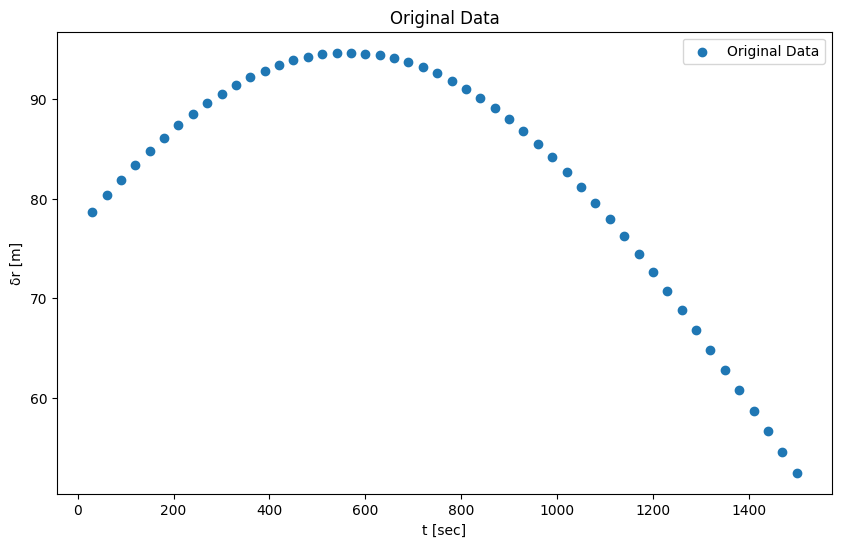

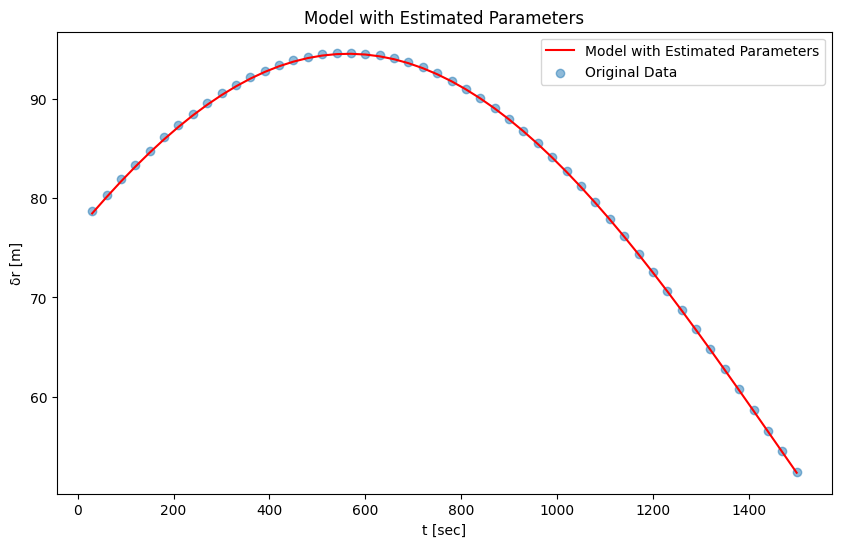

In [87]:
# Original data plot
plt.figure(figsize=(10, 6))
plt.scatter(t, delta_r, label='Original Data')
plt.xlabel('t [sec]')
plt.ylabel('δr [m]')
plt.title('Original Data')
plt.legend()

# Model plot based on estimated parameters
model_data = a_estimate * np.cos(2 * np.pi * t / 3600) + b_estimate * np.sin(2 * np.pi * t / 3600) + c_estimate

plt.figure(figsize=(10, 6))
plt.plot(t, model_data, label='Model with Estimated Parameters', color='red')
plt.scatter(t, delta_r, label='Original Data', alpha=0.5)
plt.xlabel('t [sec]')
plt.ylabel('δr [m]')
plt.title('Model with Estimated Parameters')
plt.legend()

plt.show()